In [1]:
import pandas as pd
from datautils import _get_time_features,load_forecast_csv

In [2]:
data, train_slice, valid_slice, test_slice, scaler, pred_lens, data1=load_forecast_csv("mocap",False)

data
(1285, 4)
DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 01:00:00',
               '2012-01-01 02:00:00', '2012-01-01 03:00:00',
               '2012-01-01 04:00:00', '2012-01-01 05:00:00',
               '2012-01-01 06:00:00', '2012-01-01 07:00:00',
               '2012-01-01 08:00:00', '2012-01-01 09:00:00',
               ...
               '2012-02-23 03:00:00', '2012-02-23 04:00:00',
               '2012-02-23 05:00:00', '2012-02-23 06:00:00',
               '2012-02-23 07:00:00', '2012-02-23 08:00:00',
               '2012-02-23 09:00:00', '2012-02-23 10:00:00',
               '2012-02-23 11:00:00', '2012-02-23 12:00:00'],
              dtype='datetime64[ns]', name='date', length=1285, freq=None)
(1285, 4)
data
(1285, 4)
slice(None, 771, None)
slice(771, 1028, None)
slice(1028, None, None)
(1, 1285, 4)


In [3]:
data.shape

(1, 1285, 4)

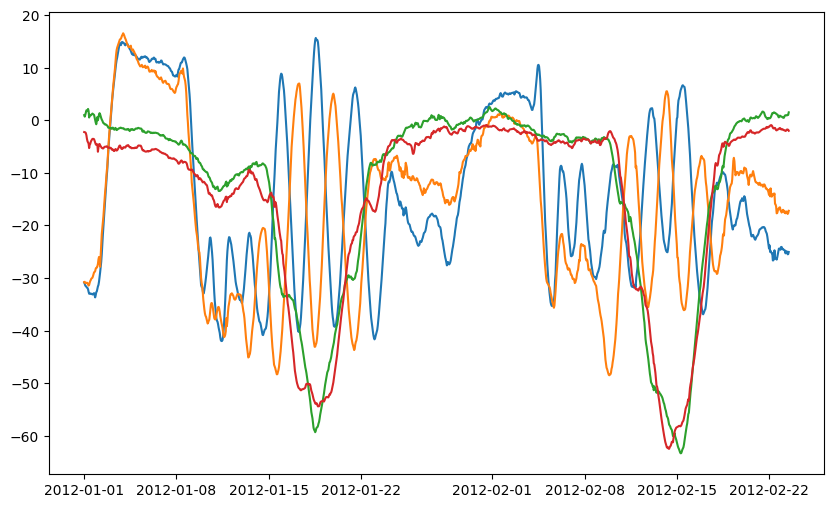

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(data1)

In [5]:
from ts2vec import TS2Vec
model = TS2Vec(
    input_dims=data.shape[-1],
    device="cpu",
    output_dims=320
    #output_dims=10
)
loss_log = model.fit(
    data,
    verbose=True,
    n_iters=200
)

loss
tensor(44.4848, grad_fn=<DivBackward0>)
loss_k1,loss_k2
tensor(2219.6726) tensor(711.3962)
Best model updated: loss=3561.767578125
Epoch #0: loss=3561.767578125
loss
tensor(50.2862, grad_fn=<DivBackward0>)
loss_k1,loss_k2
tensor(1267.9364) tensor(1299.9930)
Best model updated: loss=3131.801513671875
Epoch #1: loss=3131.801513671875
loss
tensor(4.3462, grad_fn=<DivBackward0>)
loss_k1,loss_k2
tensor(354.0643) tensor(117.4394)
Best model updated: loss=570.1507568359375
Epoch #2: loss=570.1507568359375
loss
tensor(37.7544, grad_fn=<DivBackward0>)
loss_k1,loss_k2
tensor(947.1572) tensor(1006.1186)
Epoch #3: loss=2381.685546875
loss
tensor(13.5700, grad_fn=<DivBackward0>)
loss_k1,loss_k2
tensor(587.2303) tensor(292.3783)
Epoch #4: loss=1069.100341796875
loss
tensor(4.9942, grad_fn=<DivBackward0>)
loss_k1,loss_k2
tensor(83.6071) tensor(192.0277)
Best model updated: loss=335.75592041015625
Epoch #5: loss=335.75592041015625
loss
tensor(11.5932, grad_fn=<DivBackward0>)
loss_k1,loss_k2
tenso

In [6]:
model.save(f'mocap_mix_320_200.pkl')

In [7]:
all_repr = model.encode(
        data,
        causal=False,
        sliding_length=1,
        sliding_padding= 200,
        batch_size=256
    )

a


In [8]:
test_repr = all_repr[:, test_slice]
print(test_repr)

[[[ 0.07518981 -0.00248027 -0.05584838 ...  0.01884378  0.00230921
   -0.03152571]
  [ 0.07698859  0.00284781 -0.05560794 ...  0.01882945  0.00368323
   -0.03261729]
  [ 0.07798278  0.00745822 -0.05518826 ...  0.01792409  0.00525814
   -0.03421859]
  ...
  [ 0.01641184 -0.01828502  0.0275851  ...  0.00260813 -0.01796626
    0.00241958]
  [ 0.01232036 -0.01660893  0.02170355 ...  0.00865457 -0.01505375
    0.00581076]
  [-0.00034954 -0.01875534  0.01229    ...  0.00972558 -0.01109517
    0.01727761]]]


In [9]:
all_repr.shape

(1, 1285, 320)

In [10]:
test_repr.shape

(1, 257, 320)

In [11]:
test_2d = all_repr.reshape(1285, 320)

In [12]:
from sklearn.cluster import DBSCAN

In [13]:
import numpy as np
data_test=data1

In [14]:
data_test.shape

(1285, 4)

In [15]:
dbscan = DBSCAN(eps=0.5, min_samples=5)

In [16]:
dbscan.fit(test_2d)
labels = dbscan.labels_

In [17]:
date=data_test.index
date_list=date.tolist()

/var/folders/m9/vc40_2nj7wgb3tgln7x3gdzc0000gn/T/ipykernel_5635/583540433.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', num_clusters)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


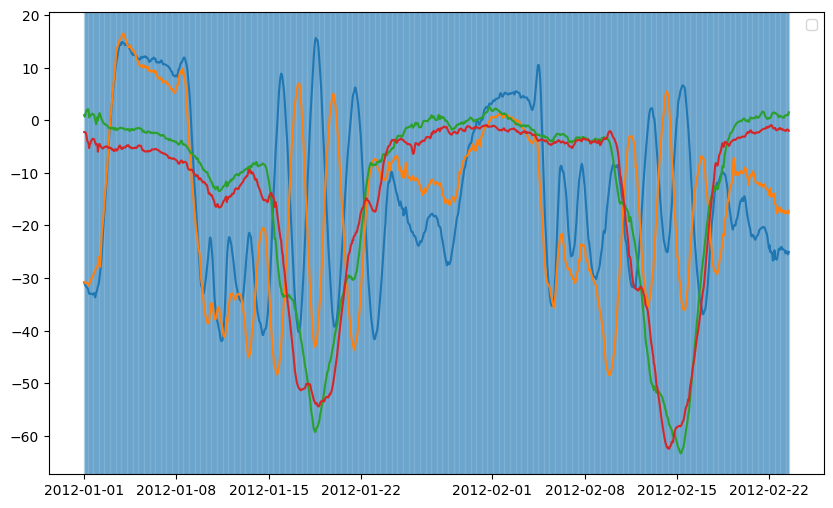

In [18]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
cmap = cm.Set1
# ラベルの一覧を取得します
num_clusters = len(set(labels))  # クラスタの数
cmap = cm.get_cmap('tab20', num_clusters) 
plt.figure(figsize=(10, 6))
plt.plot(data_test)  # cパラメータにクラスタラベルを渡す
for i in range(len(date_list)-1):
    plt.axvspan(date_list[i], date_list[i+1], color=cmap(labels[i]), alpha=0.2)
plt.legend() 
plt.show()

In [19]:
# import matplotlib.cm as cm
# from matplotlib.colors import ListedColormap
# cmap = cm.Set1
# # ラベルの一覧を取得します
# num_clusters = len(set(labels))  # クラスタの数
# cmap = cm.get_cmap('tab20', num_clusters) 
# plt.figure(figsize=(10, 6))
# # 各ラベルごとにプロットします
# for label in set(labels):
#     plt.plot(data_test[labels == label], label=f'Cluster {label}',c=cmap(label))

# #plt.legend()  # 凡例を表示します
# plt.show()

In [20]:
from sklearn.cluster import AgglomerativeClustering

# AgglomerativeClusteringオブジェクトの作成。ここではクラスタ数を3としています。
agg_clustering = AgglomerativeClustering(n_clusters=5)

# フィッティングとラベルの予測を行います
agg_clustering.fit(test_2d)
labels = agg_clustering.labels_

/var/folders/m9/vc40_2nj7wgb3tgln7x3gdzc0000gn/T/ipykernel_5635/1211746902.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', num_clusters)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


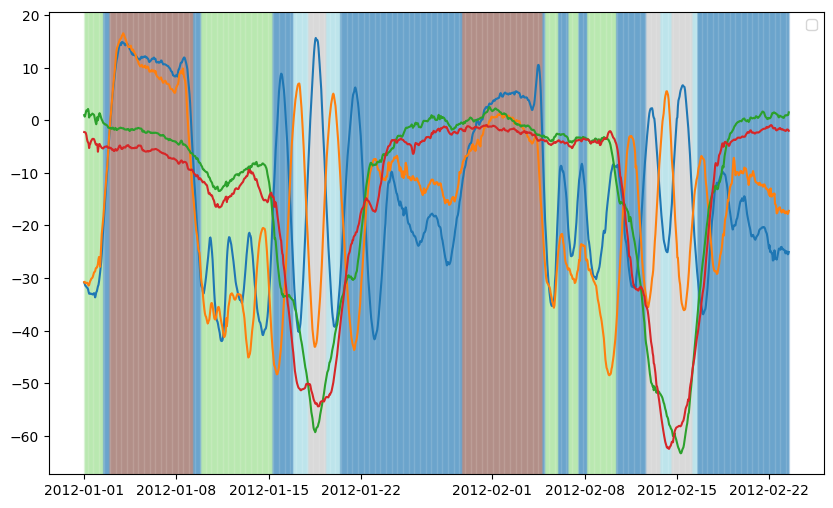

In [21]:
cmap = cm.Set1
# ラベルの一覧を取得します
num_clusters = len(set(labels))  # クラスタの数
cmap = cm.get_cmap('tab20', num_clusters) 
plt.figure(figsize=(10, 6))
plt.plot(data_test)  # cパラメータにクラスタラベルを渡す
for i in range(len(date_list)-1):
    plt.axvspan(date_list[i], date_list[i+1], color=cmap(labels[i]), alpha=0.2)
plt.legend() 
plt.show()

In [22]:
from sklearn.cluster import KMeans

# KMeansオブジェクトの作成。ここではクラスタ数（k）を3としています。
kmeans = KMeans(n_clusters=5)

# フィッティングとラベルの予測を行います
kmeans.fit(test_2d)
labels = kmeans.labels_

/Users/katoutsubasa/anaconda3/envs/tstest/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/var/folders/m9/vc40_2nj7wgb3tgln7x3gdzc0000gn/T/ipykernel_5635/3583795887.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', num_clusters)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


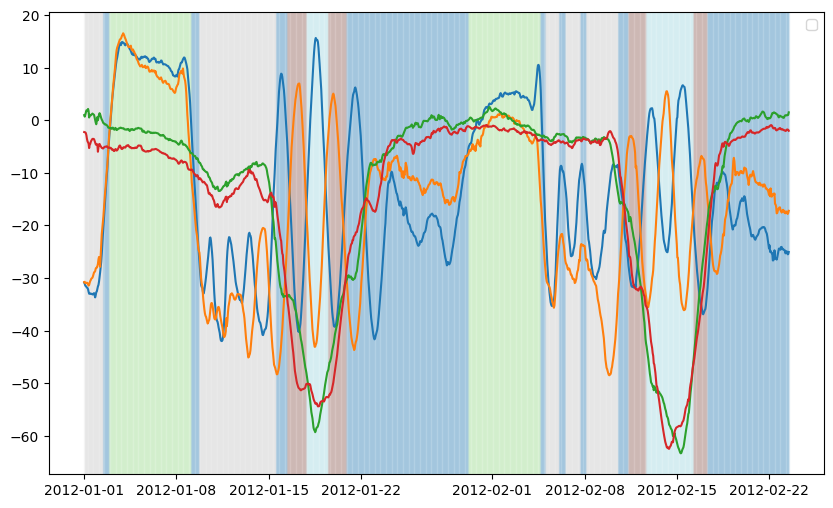

In [23]:
cmap = cm.Set1
# ラベルの一覧を取得します
num_clusters = len(set(labels))  # クラスタの数
cmap = cm.get_cmap('tab20', num_clusters) 
plt.figure(figsize=(10, 6))
plt.plot(data_test)  # cパラメータにクラスタラベルを渡す
for i in range(len(date_list)-1):
    plt.axvspan(date_list[i], date_list[i+1], color=cmap(labels[i]), alpha=0.1)
plt.legend() 
plt.show()

In [24]:
from sklearn.cluster import KMeans

# KMeansオブジェクトの作成。ここではクラスタ数（k）を3としています。
kmeans = KMeans(n_clusters=4)

# フィッティングとラベルの予測を行います
kmeans.fit(test_2d)
labels = kmeans.labels_

/Users/katoutsubasa/anaconda3/envs/tstest/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/var/folders/m9/vc40_2nj7wgb3tgln7x3gdzc0000gn/T/ipykernel_5635/3583795887.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', num_clusters)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


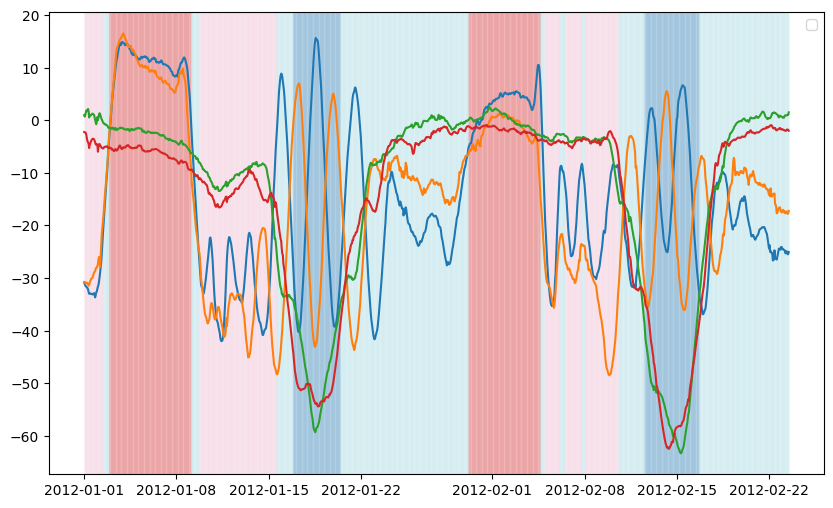

In [25]:
cmap = cm.Set1
# ラベルの一覧を取得します
num_clusters = len(set(labels))  # クラスタの数
cmap = cm.get_cmap('tab20', num_clusters) 
plt.figure(figsize=(10, 6))
plt.plot(data_test)  # cパラメータにクラスタラベルを渡す
for i in range(len(date_list)-1):
    plt.axvspan(date_list[i], date_list[i+1], color=cmap(labels[i]), alpha=0.1)
plt.legend() 
plt.show()

In [26]:
# KMeansオブジェクトの作成。ここではクラスタ数（k）を3としています。
kmeans = KMeans(n_clusters=3)

# フィッティングとラベルの予測を行います
kmeans.fit(test_2d)
labels = kmeans.labels_

/Users/katoutsubasa/anaconda3/envs/tstest/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/var/folders/m9/vc40_2nj7wgb3tgln7x3gdzc0000gn/T/ipykernel_5635/3583795887.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', num_clusters)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


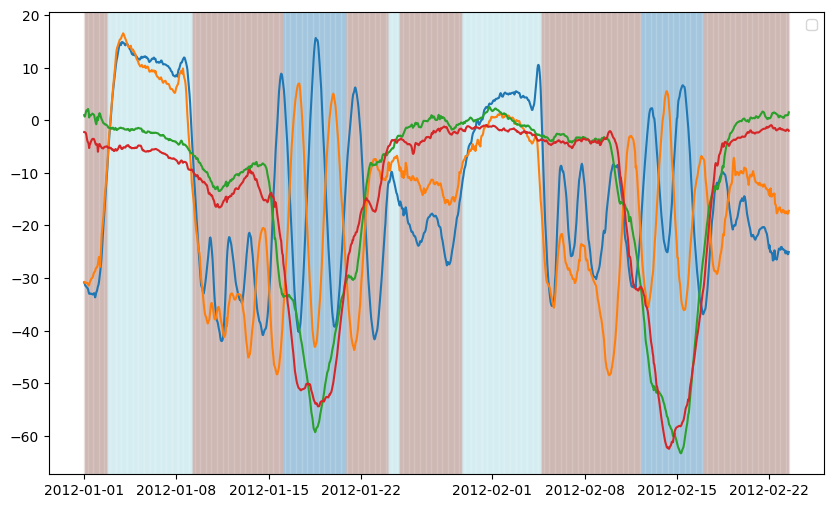

In [27]:
cmap = cm.Set1
# ラベルの一覧を取得します
num_clusters = len(set(labels))  # クラスタの数
cmap = cm.get_cmap('tab20', num_clusters) 
plt.figure(figsize=(10, 6))
plt.plot(data_test)  # cパラメータにクラスタラベルを渡す
for i in range(len(date_list)-1):
    plt.axvspan(date_list[i], date_list[i+1], color=cmap(labels[i]), alpha=0.1)
plt.legend() 
plt.show()

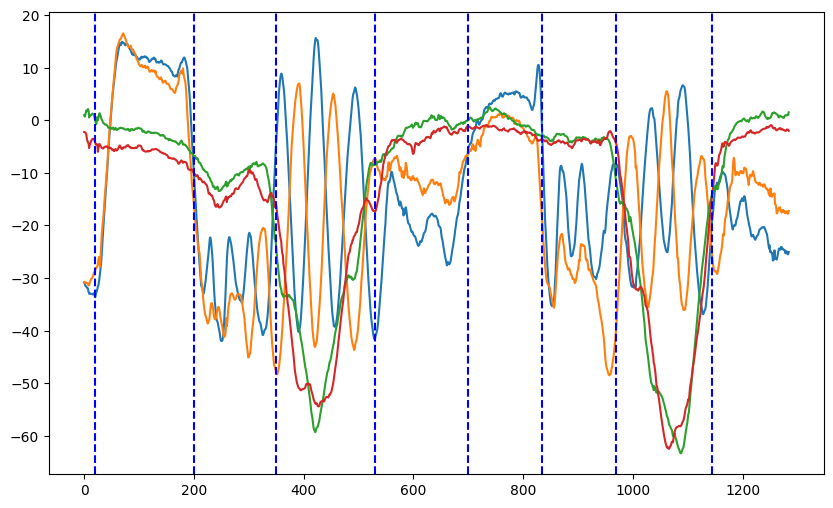

In [28]:
# 日付をエポック秒に変換
data_test_copy=data_test.copy()
# dateを1,2,3,...に変更
data_test_copy.reset_index(drop=True, inplace=True)
#data_test_copy['date'] = range(1, len(data_test_copy) + 1)
data_test_copy
plt.figure(figsize=(10, 6))
plt.plot(data_test_copy) 
plt.axvline(x=19, color='b', linestyle='--')
plt.axvline(x=200, color='b', linestyle='--')
plt.axvline(x=350, color='b', linestyle='--')
plt.axvline(x=530, color='b', linestyle='--')
plt.axvline(x=700, color='b', linestyle='--')
plt.axvline(x=835, color='b', linestyle='--')
plt.axvline(x=970, color='b', linestyle='--')
plt.axvline(x=1145, color='b', linestyle='--')

/var/folders/m9/vc40_2nj7wgb3tgln7x3gdzc0000gn/T/ipykernel_5635/1855845376.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', num_clusters)


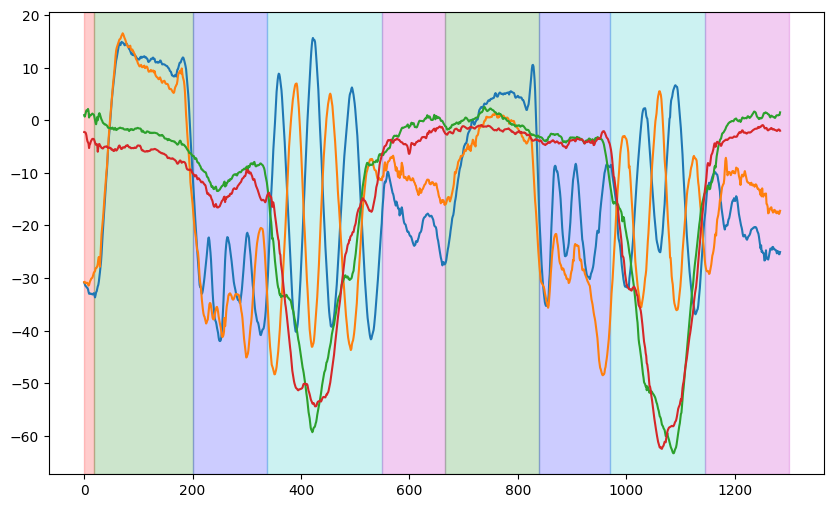

In [29]:
# 日付をエポック秒に変換
data_test_copy=data_test.copy()
# dateを1,2,3,...に変更
data_test_copy.reset_index(drop=True, inplace=True)
#data_test_copy['date'] = range(1, len(data_test_copy) + 1)
data_test_copy
plt.figure(figsize=(10, 6))

regime_list=[0,19,200,338,550,665,840,970,1145,1300]
colors =  ["r", "g", "b", "c", "m", "g", "b", "c","m","y"]
plt.plot(data_test_copy) 
num_clusters = len(set(regime_list))  # クラスタの数
cmap = cm.get_cmap('tab20', num_clusters) 
for i in range(len(regime_list)-1):
    plt.axvspan(regime_list[i], regime_list[i+1], color=colors[i], alpha=0.2)

In [30]:
from sklearn.manifold import TSNE
regime_list=[0,19,200,338,550,665,840,970,1145,1300]
# t-SNEのモデルを作成
tsne = TSNE(n_components=3, random_state = 0, perplexity = 30, n_iter = 10000)

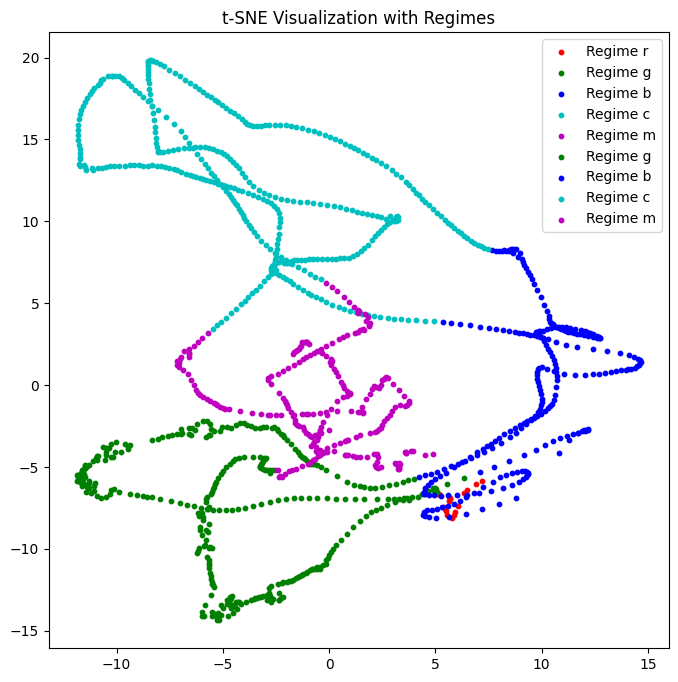

In [31]:
# 高次元データを低次元に変換
data_tsne = tsne.fit_transform(test_2d)
regime_label=[0,1,2,3,4,1,2,3,4,5]

# 各regimeごとに色を指定
colors =  ["r", "g", "b", "c", "m", "g", "b", "c","m","y"]

# プロット
plt.figure(figsize=(8, 8))

for i in range(len(regime_list) - 1):
    start_idx = regime_list[i]
    end_idx = regime_list[i + 1]
    plt.scatter(
        data_tsne[start_idx:end_idx, 0],
        data_tsne[start_idx:end_idx, 1],
        color=colors[i],
        label=f"Regime {colors[i]}",
        s=10
    )
plt.title("t-SNE Visualization with Regimes")
plt.legend()
plt.show()

In [32]:
from sklearn.manifold import TSNE
regime_list=[0,19,200,338,550,665,840,970,1145,1300]
# t-SNEのモデルを作成
tsne = TSNE(n_components=2, random_state = 0, perplexity = 30, n_iter = 10000)

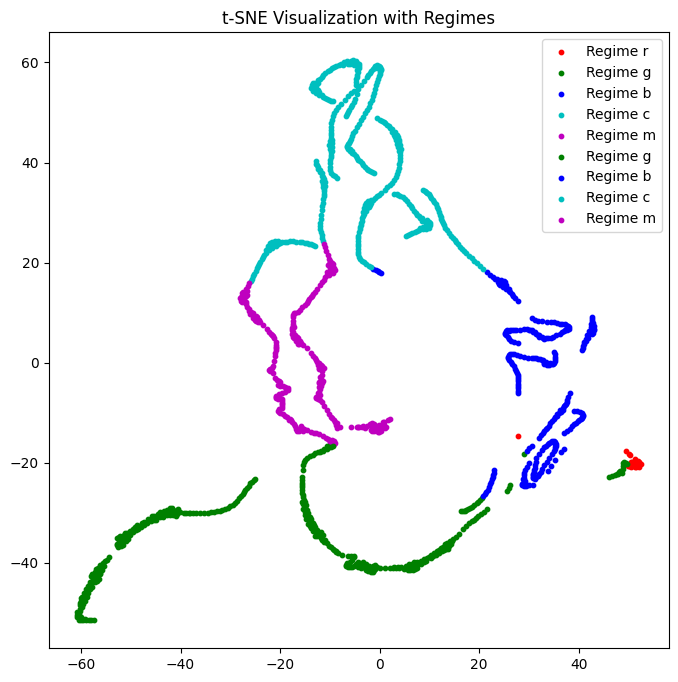

In [33]:
# 高次元データを低次元に変換
data_tsne = tsne.fit_transform(test_2d)
regime_label=[0,1,2,3,4,1,2,3,4,5]

# 各regimeごとに色を指定
colors =  ["r", "g", "b", "c", "m", "g", "b", "c","m","y"]

# プロット
plt.figure(figsize=(8, 8))

for i in range(len(regime_list) - 1):
    start_idx = regime_list[i]
    end_idx = regime_list[i + 1]
    plt.scatter(
        data_tsne[start_idx:end_idx, 0],
        data_tsne[start_idx:end_idx, 1],
        color=colors[i],
        label=f"Regime {colors[i]}",
        s=10
    )
plt.title("t-SNE Visualization with Regimes")
plt.legend()
plt.show()